# Business Problem Description

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

#### Objective
The Aim of this case study is define a approach to minimize customer churn, and  predict customers having high probability to churn

# Approch Followed 

### 1. Data Preperation & Cleansing
        
    - Telecom Churn Data Load
    - Data Analysis to develop data understanding and familiarity
    - Handling Missing Values
    - Data Cleansing which directly impacts the model performance and insights come out more clearly
  
### 2. EDA

    - Univariate analysis for categorical column
    - Bi-VArient analysis of attributes
    - Correlation analysis
 
### 4. Model Building
    - Train test split of data
    - Scaling the data 
    - Handling Class Imbalance 
    - Regression using Ridge
    - Developing Logistic Regression 
    - Building PCA model 
    - Using Random forest with PCA 
    - Hyperparameter tunning 

### 5. Conclusion
    - Final Model Selection
    - Deriving strong churn indicator variables 
    - Business Recommendation

#### Import Libraries

In [1]:
# Importing the relevant libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## Step 1 - Data Preperation

#### 1.1 Data Load

In [2]:
##Loading the Input Data(contained in CSV file)
telecom_data=pd.read_csv('telecom_churn_data.csv')

In [3]:
##Observe data
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

#### 1.2 Data Analysis

In [4]:
## Check the Shape/Dimension of data
telecom_data.shape

(99999, 226)

In [5]:
# Analyzing numerical attributes
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# Analyzing Type & number of values for each field
telecom_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

#### 1.3 Missing Value Analysis

In [7]:
# Cheking # of number of missing values for each coloumn
Missing_Value=round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2).reset_index()
Missing_Value.columns=['Column Name','Missing Value Count']
Missing_Value[Missing_Value['Missing Value Count']>0]
Missing_Value.sort_values(by='Missing Value Count', ascending=False)

,Column Name,Missing Value Count
189,arpu_3g_6,74.85
197,night_pck_user_6,74.85
161,total_rech_data_6,74.85
193,arpu_2g_6,74.85
165,max_rech_data_6,74.85
217,fb_user_6,74.85
177,av_rech_amt_data_6,74.85
157,date_of_last_rech_data_6,74.85
169,count_rech_2g_6,74.85
173,count_rech_3g_6,74.85


Missing values present in many columns. Here we will identify the missing values and either drop or impute them accordingly

In [8]:
##list down all recharge columns
churn_recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom_data[churn_recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [9]:
## some recharge values are missing because the customer didn't recharge 
## check the missing values

telecom_data.loc[telecom_data.total_rech_data_7.isnull() & telecom_data.date_of_last_rech_data_7.isnull(),\
          ["total_rech_data_7", "date_of_last_rech_data_7"]].head(10)

,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN
13,NaN,NaN


In [10]:
#Let's impute 0 in recharge columns
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [11]:
# Now impute missing values with 0
telecom_data[zero_impute_rch] = telecom_data[zero_impute_rch].apply(lambda x: x.fillna(0))

In [12]:
##check missing value percentage after imputation
print(telecom_data[zero_impute_rch].isnull().sum()*100/telecom_data.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


#### 1.4 Data Cleansing 

In [13]:
###list dowm id_column, category column and date columns
telecom_churn_id_cols = ['mobile_number', 'circle_id']
telecom_churn_date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
telecom_churn_cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [14]:
# Dropping the columns 
telecom_data = telecom_data.drop(telecom_churn_id_cols + telecom_churn_date_cols, axis=1)
telecom_data.shape

(99999, 212)

In [15]:
# replace missing values with '-1' in categorical columns
telecom_data[telecom_churn_cat_cols] = telecom_data[telecom_churn_cat_cols].apply(lambda x: x.fillna(-1))

In [16]:
# Calculating missing values in terms of percentage
Missing_Percentage=round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)
Missing_Percentage=Missing_Percentage.reset_index()
Missing_Percentage.columns=['Column Name','Missing Value Count']
Missing_Percentage[Missing_Percentage['Missing Value Count']>0]
Missing_Percentage.sort_values(by='Missing Value Count', ascending=False)

,Column Name,Missing Value Count
175,arpu_3g_6,74.85
159,count_rech_3g_6,74.85
155,count_rech_2g_6,74.85
179,arpu_2g_6,74.85
176,arpu_3g_7,74.43
160,count_rech_3g_7,74.43
156,count_rech_2g_7,74.43
180,arpu_2g_7,74.43
162,count_rech_3g_9,74.08
178,arpu_3g_9,74.08


In [17]:
# Finding number of columns with missing values percentage more than 73
Missing_Percentage[Missing_Percentage['Missing Value Count']>73].shape

(16, 2)

In [18]:
#Determining Columns having missing percentage more than 73
Redundant_Columns=Missing_Percentage[Missing_Percentage['Missing Value Count']>73].iloc[:,0]
Redundant_Columns=list(Redundant_Columns)

In [19]:
##Finding set of useful columns post removing columns having significant missing values 
Useful_Columns=list(set(telecom_data.columns)-set(Redundant_Columns))
telecom_data=telecom_data[Useful_Columns]

In [20]:
##Validating the dimension of final data set
telecom_data.shape

(99999, 196)

In [21]:
Missing_Percentage=round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)
Missing_Percentage=Missing_Percentage.reset_index()
Missing_Percentage.columns=['Column Name','Missing Value Count']
Missing_Percentage[Missing_Percentage['Missing Value Count']>0]
Missing_Percentage.sort_values(by='Missing Value Count', ascending=False)

,Column Name,Missing Value Count
97,std_og_t2f_mou_9,7.75
23,roam_og_mou_9,7.75
99,std_ic_mou_9,7.75
129,loc_og_t2f_mou_9,7.75
152,loc_og_t2m_mou_9,7.75
164,loc_ic_t2m_mou_9,7.75
41,loc_og_mou_9,7.75
47,roam_ic_mou_9,7.75
96,spl_ic_mou_9,7.75
114,isd_og_mou_9,7.75


In [22]:
# imputing the respective null columns as 0. 
telecom_data[telecom_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = telecom_data[telecom_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [23]:
telecm_churn_recharge_col=['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [24]:
###observe recharge column data
telecom_data.loc[:,telecm_churn_recharge_col].head(10)

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,362,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0
1,74,384,283,121,44,154,65,50,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,154.0,50.0,0.0
2,168,315,116,358,86,200,86,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0
3,230,310,601,410,60,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,196,350,287,200,56,110,110,50,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
5,120,0,130,130,120,0,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,499,222,294,141,90,37,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1580,790,3638,0,1580,790,1580,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,437,601,120,186,90,154,30,36,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0
9,220,195,210,180,110,154,50,130,0.0,1.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,154.0,0.0,0.0


In [25]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
telecom_data['total_data_rech_6'] = telecom_data.total_rech_data_6 * telecom_data.av_rech_amt_data_6
telecom_data['total_data_rech_7'] = telecom_data.total_rech_data_7 * telecom_data.av_rech_amt_data_7

In [26]:
# Total recharge amount for June and July 
telecom_data['amt_data_6'] = telecom_data.total_rech_amt_6 + telecom_data.total_data_rech_6
telecom_data['amt_data_7'] = telecom_data.total_rech_amt_7 + telecom_data.total_data_rech_7

In [27]:
# average recharge done by customer in June and July
telecom_data['av_amt_data_6_7'] = (telecom_data.amt_data_6 + telecom_data.amt_data_7)/2

In [28]:
telecom_data.head()

,jun_vbc_3g,std_ic_t2t_mou_8,std_ic_mou_6,loc_og_t2m_mou_6,roam_ic_mou_7,loc_ic_mou_8,total_ic_mou_6,fb_user_7,total_ic_mou_7,offnet_mou_8,roam_og_mou_6,arpu_8,std_og_t2o_mou,std_og_t2c_mou_9,last_day_rch_amt_7,total_og_mou_8,sachet_3g_8,total_rech_num_7,roam_og_mou_7,max_rech_amt_6,fb_user_9,vol_3g_mb_8,roam_og_mou_8,roam_og_mou_9,ic_others_9,total_rech_num_6,isd_ic_mou_6,offnet_mou_7,std_og_t2m_mou_6,std_og_t2c_mou_6,std_ic_t2f_mou_7,max_rech_amt_7,std_og_mou_6,spl_ic_mou_7,monthly_2g_6,vol_3g_mb_9,loc_ic_t2o_mou,sachet_3g_6,std_og_t2c_mou_8,std_ic_t2t_mou_7,loc_og_t2f_mou_6,loc_og_mou_9,isd_ic_mou_7,std_og_t2t_mou_7,std_ic_t2m_mou_7,loc_og_mou_8,loc_ic_t2t_mou_6,roam_ic_mou_9,onnet_mou_7,std_ic_t2o_mou_8,std_og_mou_7,aug_vbc_3g,last_day_rch_amt_6,std_og_t2c_mou_7,loc_ic_mou_9,isd_ic_mou_9,sep_vbc_3g,std_ic_t2o_mou_7,monthly_3g_7,og_others_7,fb_user_8,std_og_t2t_mou_9,loc_og_t2f_mou_7,night_pck_user_6,sachet_2g_9,night_pck_user_9,total_og_mou_9,std_ic_t2m_mou_6,total_rech_amt_6,loc_og_t2t_mou_8,std_og_t2f_mou_8,total_ic_mou_8,loc_og_t2c_mou_8,vol_3g_mb_6,loc_ic_t2t_mou_9,onnet_mou_8,loc_og_mou_6,total_rech_data_9,offnet_mou_6,max_rech_data_8,total_og_mou_6,isd_og_mou_7,std_ic_t2m_mou_8,loc_og_t2t_mou_6,av_rech_amt_data_8,spl_og_mou_6,isd_og_mou_6,loc_ic_t2t_mou_8,std_ic_t2t_mou_9,sachet_3g_9,max_rech_data_9,isd_og_mou_8,std_ic_t2m_mou_9,jul_vbc_3g,max_rech_data_6,loc_ic_t2t_mou_7,spl_ic_mou_9,std_og_t2f_mou_9,monthly_3g_6,std_ic_mou_9,roam_ic_mou_8,ic_others_7,loc_og_t2c_mou_7,loc_ic_mou_6,std_og_t2m_mou_9,spl_ic_mou_6,std_og_t2f_mou_6,vol_2g_mb_8,loc_ic_t2f_mou_7,total_rech_num_9,ic_others_6,monthly_2g_7,last_day_rch_amt_9,spl_og_mou_9,isd_og_mou_9,isd_ic_mou_8,og_others_6,vol_2g_mb_6,monthly_3g_9,loc_og_t2t_mou_7,std_ic_t2t_mou_6,loc_ic_t2f_mou_8,loc_ic_mou_7,arpu_9,aon,monthly_3g_8,std_og_t2m_mou_8,total_rech_amt_9,sachet_3g_7,loc_og_t2f_mou_9,std_og_t2t_mou_8,loc_og_t2m_mou_7,std_ic_t2o_mou_6,loc_og_t2c_mou_9,arpu_6,loc_ic_t2f_mou_9,loc_ic_t2m_mou_7,total_og_mou_7,std_og_mou_8,sachet_2g_6,vol_3g_mb_7,onnet_mou_9,spl_og_mou_7,total_ic_mou_9,loc_og_mou_7,std_ic_t2f_mou_8,loc_ic_t2m_mou_6,total_rech_num_8,spl_og_mou_8,spl_ic_mou_8,night_pck_user_8,total_rech_amt_7,loc_og_t2m_mou_9,ic_others_8,total_rech_data_8,std_og_t2m_mou_7,std_ic_t2f_mou_9,std_ic_t2o_mou_9,max_rech_amt_8,loc_og_t2f_mou_8,loc_ic_t2m_mou_8,vol_2g_mb_7,std_og_mou_9,sachet_2g_7,loc_ic_t2m_mou_9,total_rech_data_6,std_og_t2t_mou_6,std_ic_t2f_mou_6,max_rech_amt_9,last_day_rch_amt_8,sachet_2g_8,monthly_2g_9,onnet_mou_6,offnet_mou_9,av_rech_amt_data_7,max_rech_data_7,og_others_9,std_ic_mou_7,std_og_t2f_mou_7,fb_user_6,loc_og_t2m_mou_8,og_others_8,av_rech_amt_data_6,av_rech_amt_data_9,night_pck_user_7,arpu_7,loc_og_t2t_mou_9,roam_ic_mou_6,std_ic_mou_8,loc_og_t2o_mou,total_rech_amt_8,vol_2g_mb_9,monthly_2g_8,total_rech_data_7,loc_ic_t2f_mou_6,loc_og_t2c_mou_6,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,101.20,0.00,0.00,0.00,0.00,5.44,0.00,1.0,0.00,0.00,0.0,213.803,0.0,0.0,252,0.00,0,3,0.00,252,-1.0,109.61,0.00,0.00,0.00,4,0.00,0.00,0.00,0.0,0.00,252,0.00,0.0,0,0.00,0.0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,30.4,252,0.0,0.00,0.00,3.58,0.0,1,0.0,1.0,0.00,0.00,0.0,0,-1.0,0.00,0.00,362,0.00,0.00,5.44,0.00,83.57,0.00,0.00,0.00,0.0,0.00,252.0,0.00,0.0,0.00,0.00,252.0,0.00,0.0,0.16,0.00,0,0.0,0.0,0.00,0.0,252.0,0.00,0.00,0.0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.75,0.00,6,0.00,0,0,0.00,0.0,0.0,0.00,30.13,0,0.00,0.00,1.15,0.00,21.100,968,1,0.00,0,0,0.00,0.00,0.00,0.0,0.00,197.385,0.00,0.00,0.00,0.00,0,150.76,0.00,0.00,0.00,0.00,0.00,0.00,2,0.00,0.0,0.0,252,0.00,0.0,1.0,0.00,0.00,0.0,252,0.00,4.13,1.32,0.00,0,0.00,1.0,0.00,0.00,0,252,0,0,0.00,0.00,252.0,252.0,0.0,0.00,0.00,1.0,0.00,0.0,252.0,0.0,0.0,214.816,0.00,0.0,0.00,0.0,252,0.0,0,1.0,0.00,0.0,252.0,252.0,614.0,504.0,559.0
1,0.00,2.35,5.90,11.51,0.00,408.43,26.83,1.0,104.23,304.76,0.0,268.321,0.0,0.0,23,312.44,0,9,0.00,44,-1.0,0.00,0.00,0.00,0.00,4,1.83,9

In [29]:
##observe the recharge columns
telecom_data[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


In [30]:
##find out 70th percentile
telecom_data.av_amt_data_6_7.quantile(0.7)

478.0

In [31]:
telecom_data.shape

(99999, 201)

#### 1.5 Filtering high-value customers

In [32]:
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
churn_high_val_cust = telecom_data.loc[telecom_data.av_amt_data_6_7 > telecom_data.av_amt_data_6_7.quantile(0.7), :]
churn_high_val_cust = churn_high_val_cust.reset_index(drop=True)
churn_high_val_cust.shape

(29953, 201)

Now we will find out tag the churned customers (churn=1, else 0) based on the fourth month
- Those who have not made any calls (either incoming or outgoing) 
- Those who have not used mobile internet even once in the churn phase.

Following columns are needed to derive churn column 
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [33]:
churn_high_val_cust['churn'] = np.where(churn_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
churn_high_val_cust.head()
# change data type to category
churn_high_val_cust.churn = churn_high_val_cust.churn.astype("category")

In [34]:
# calculate churn percentage
churn_high_val_cust['churn'].value_counts()/len(churn_high_val_cust)*100

0    91.877274
1     8.122726
Name: churn, dtype: float64

Here approx. 8.1% of high value customers have churned

In [35]:
churn_high_val_cust[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.00,0.00
2,0,34.91,142.18,0.00,0.00
3,0,252.61,1031.53,0.00,0.00
4,0,127.48,127.63,13.93,314.74
...,...,...,...,...,...
29948,0,391.63,64.21,0.00,0.00
29949,0,149.26,14.44,723.41,232.56
29950,0,547.11,1095.24,9.14,941.48
29951,0,265.84,182.16,0.05,393.34


In [36]:
churn_high_val_cust.shape

(29953, 202)

In [37]:
month_9_columns=churn_high_val_cust.columns[churn_high_val_cust.columns.str.contains('_9')]
month_9_columns

Index(['std_og_t2c_mou_9', 'fb_user_9', 'roam_og_mou_9', 'ic_others_9',
       'vol_3g_mb_9', 'loc_og_mou_9', 'roam_ic_mou_9', 'loc_ic_mou_9',
       'isd_ic_mou_9', 'std_og_t2t_mou_9', 'sachet_2g_9', 'night_pck_user_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'total_rech_data_9',
       'std_ic_t2t_mou_9', 'sachet_3g_9', 'max_rech_data_9',
       'std_ic_t2m_mou_9', 'spl_ic_mou_9', 'std_og_t2f_mou_9', 'std_ic_mou_9',
       'std_og_t2m_mou_9', 'total_rech_num_9', 'last_day_rch_amt_9',
       'spl_og_mou_9', 'isd_og_mou_9', 'monthly_3g_9', 'arpu_9',
       'total_rech_amt_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_ic_t2f_mou_9', 'onnet_mou_9', 'total_ic_mou_9', 'loc_og_t2m_mou_9',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_og_mou_9',
       'loc_ic_t2m_mou_9', 'max_rech_amt_9', 'monthly_2g_9', 'offnet_mou_9',
       'og_others_9', 'av_rech_amt_data_9', 'loc_og_t2t_mou_9', 'vol_2g_mb_9'],
      dtype='object')

In [38]:
## Dropping last month i.e. month #9 columns as this is the last month and also last phase of chrun cycle 
churn_high_val_cust.drop(month_9_columns,axis=1,inplace=True)

In [39]:
churn_high_val_cust.shape

(29953, 155)

In [40]:
unique_columns=[]

In [41]:
churn_high_val_cust.head()

,jun_vbc_3g,std_ic_t2t_mou_8,std_ic_mou_6,loc_og_t2m_mou_6,roam_ic_mou_7,loc_ic_mou_8,total_ic_mou_6,fb_user_7,total_ic_mou_7,offnet_mou_8,roam_og_mou_6,arpu_8,std_og_t2o_mou,last_day_rch_amt_7,total_og_mou_8,sachet_3g_8,total_rech_num_7,roam_og_mou_7,max_rech_amt_6,vol_3g_mb_8,roam_og_mou_8,total_rech_num_6,isd_ic_mou_6,offnet_mou_7,std_og_t2m_mou_6,std_og_t2c_mou_6,std_ic_t2f_mou_7,max_rech_amt_7,std_og_mou_6,spl_ic_mou_7,monthly_2g_6,loc_ic_t2o_mou,sachet_3g_6,std_og_t2c_mou_8,std_ic_t2t_mou_7,loc_og_t2f_mou_6,isd_ic_mou_7,std_og_t2t_mou_7,std_ic_t2m_mou_7,loc_og_mou_8,loc_ic_t2t_mou_6,onnet_mou_7,std_ic_t2o_mou_8,std_og_mou_7,aug_vbc_3g,last_day_rch_amt_6,std_og_t2c_mou_7,sep_vbc_3g,std_ic_t2o_mou_7,monthly_3g_7,og_others_7,fb_user_8,loc_og_t2f_mou_7,night_pck_user_6,std_ic_t2m_mou_6,total_rech_amt_6,loc_og_t2t_mou_8,std_og_t2f_mou_8,total_ic_mou_8,loc_og_t2c_mou_8,vol_3g_mb_6,onnet_mou_8,loc_og_mou_6,offnet_mou_6,max_rech_data_8,total_og_mou_6,isd_og_mou_7,std_ic_t2m_mou_8,loc_og_t2t_mou_6,av_rech_amt_data_8,spl_og_mou_6,isd_og_mou_6,loc_ic_t2t_mou_8,isd_og_mou_8,jul_vbc_3g,max_rech_data_6,loc_ic_t2t_mou_7,monthly_3g_6,roam_ic_mou_8,ic_others_7,loc_og_t2c_mou_7,loc_ic_mou_6,spl_ic_mou_6,std_og_t2f_mou_6,vol_2g_mb_8,loc_ic_t2f_mou_7,ic_others_6,monthly_2g_7,isd_ic_mou_8,og_others_6,vol_2g_mb_6,loc_og_t2t_mou_7,std_ic_t2t_mou_6,loc_ic_t2f_mou_8,loc_ic_mou_7,aon,monthly_3g_8,std_og_t2m_mou_8,sachet_3g_7,std_og_t2t_mou_8,loc_og_t2m_mou_7,std_ic_t2o_mou_6,arpu_6,loc_ic_t2m_mou_7,total_og_mou_7,std_og_mou_8,sachet_2g_6,vol_3g_mb_7,spl_og_mou_7,loc_og_mou_7,std_ic_t2f_mou_8,loc_ic_t2m_mou_6,total_rech_num_8,spl_og_mou_8,spl_ic_mou_8,night_pck_user_8,total_rech_amt_7,ic_others_8,total_rech_data_8,std_og_t2m_mou_7,max_rech_amt_8,loc_og_t2f_mou_8,loc_ic_t2m_mou_8,vol_2g_mb_7,sachet_2g_7,total_rech_data_6,std_og_t2t_mou_6,std_ic_t2f_mou_6,last_day_rch_amt_8,sachet_2g_8,onnet_mou_6,av_rech_amt_data_7,max_rech_data_7,std_ic_mou_7,std_og_t2f_mou_7,fb_user_6,loc_og_t2m_mou_8,og_others_8,av_rech_amt_data_6,night_pck_user_7,arpu_7,roam_ic_mou_6,std_ic_mou_8,loc_og_t2o_mou,total_rech_amt_8,monthly_2g_8,total_rech_data_7,loc_ic_t2f_mou_6,loc_og_t2c_mou_6,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,churn
0,101.20,0.00,0.00,0.00,0.00,5.44,0.00,1.0,0.00,0.00,0.00,213.803,0.0,252,0.00,0,3,0.00,252,109.61,0.00,4,0.00,0.00,0.00,0.0,0.00,252,0.00,0.0,0,0.0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,30.40,252,0.0,3.58,0.0,1,0.0,1.0,0.00,0.0,0.00,362,0.00,0.00,5.44,0.00,83.57,0.00,0.00,0.00,252.0,0.00,0.00,0.00,0.00,252.0,0.0,0.0,0.16,0.00,0.00,252.0,0.00,1,0.00,0.00,0.0,0.00,0.00,0.00,5.75,0.00,0.00,0,0.00,0.0,30.13,0.00,0.00,1.15,0.00,968,1,0.00,0,0.00,0.00,0.0,197.385,0.00,0.00,0.00,0,150.76,0.0,0.00,0.00,0.00,2,0.00,0.0,0.0,252,0.00,1.0,0.00,252,0.00,4.13,1.32,0,1.0,0.00,0.00,252,0,0.00,252.0,252.0,0.00,0.00,1.0,0.00,0.0,252.0,0.0,214.816,0.00,0.00,0.0,252,0,1.0,0.00,0.0,252.0,252.0,614.0,504.0,559.0,1
1,18.74,30.39,180.54,308.63,33.49,188.04,626.46,-1.0,558.04,325.91,23.74,3171.480,0.0,0,350.16,0,5,12.59,1580,0.00,38.06,5,2.06,567.16,49.89,0.0,34.24,790,60.86,0.0,0,0.0,0,0.0,11.83,62.13,14.53,23.29,126.99,255.79,58.14,54.68,0.0,75.14,57.74,0,0.0,0.00,0.0,0,0.0,-1.0,55.14,-1.0,91.44,1580,40.28,16.68,428.74,0.00,0.00,52.29,422.16,453.43,0.0,487.53,0.18,141.33,51.39,0.0,4.5,0.0,27.31,10.01,19.38,0.0,32.26,0,31.64,15.19,0.0,427.88,0.21,6.66,0.00,101.46,15.74,0,31.59,0.0,0.00,31.38,36.89,39.53,355.23,802,0,49.14,0,12.01,447.38,0.0,1069.180,221.49,609.24,77.84,0,0.00,0.0,533.91,22.21,217.56,7,6.50,0.0,-1.0,790,15.14,0.0,31.76,1580,53.23,121.19,0.00,0,0.0,4.30,52.19,779,0,57.84,0.0,0.0,173.08,20.08,-1.0,162.28,0.0,0.0,-1.0,1349.850,16.23,193.94,0.0,3638,0,0.0,152.16,0.0,0.0,0.0,1580.0,790.0,1185.0,1
2,122.16,0.10,22.43,80.96,0.00,15.79,103.86,1.0,28.49,136.48,0.00,137.362,0.0,0,171.56,0,21,0.00,90,11.94,0.00,19,0.00,80.63,13.69,0.0,0.00,154,130.26,0.0,0,0.0,0,0.0,0.58,0.00,0.00,133.43,4.08,63.04,23.84,351.03,0

In [42]:
## observe datatypes
churn_high_val_cust.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 155 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   jun_vbc_3g          29953 non-null  float64 
 1   std_ic_t2t_mou_8    29953 non-null  float64 
 2   std_ic_mou_6        29953 non-null  float64 
 3   loc_og_t2m_mou_6    29953 non-null  float64 
 4   roam_ic_mou_7       29953 non-null  float64 
 5   loc_ic_mou_8        29953 non-null  float64 
 6   total_ic_mou_6      29953 non-null  float64 
 7   fb_user_7           29953 non-null  float64 
 8   total_ic_mou_7      29953 non-null  float64 
 9   offnet_mou_8        29953 non-null  float64 
 10  roam_og_mou_6       29953 non-null  float64 
 11  arpu_8              29953 non-null  float64 
 12  std_og_t2o_mou      29953 non-null  float64 
 13  last_day_rch_amt_7  29953 non-null  int64   
 14  total_og_mou_8      29953 non-null  float64 
 15  sachet_3g_8         29953 non-null 

In [43]:
##list down the unique column names
unique_columns =['loc_ic_t2o_mou' ,'loc_og_t2o_mou' ,'std_og_t2c_mou_6','std_ic_t2o_mou_6', 'std_og_t2c_mou_7', 
                 'std_ic_t2o_mou_7','std_og_t2c_mou_8', 'std_ic_t2o_mou_8']

In [44]:
## Dropping columns with unique values 
churn_high_val_cust.drop(unique_columns,axis=1,inplace=True)

In [45]:
churn_high_val_cust.shape

(29953, 147)

### Step 2 - Exploratory Data Analysis (EDA)

#### 2.1 Umivarient Analysis

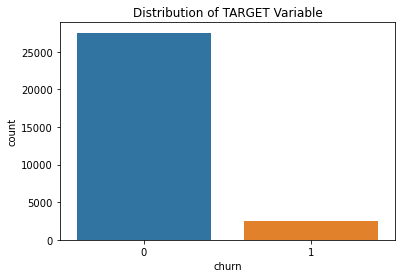

In [46]:
####plot to caheck imblance percentage of target column
sns.countplot(churn_high_val_cust['churn'])
plt.title("Distribution of TARGET Variable")
plt.show()

#### Inferences:
- 8.1% of high value customers have churned
- Data is highely imblanced

In [47]:
##check the value counts 
churn_high_val_cust['churn'].value_counts(normalize= 2)

0    0.918773
1    0.081227
Name: churn, dtype: float64

#### For correlation identify categorical columns and convert datatype of that column to category 

In [48]:
##get unique value count of all columns
churn_high_val_cust.nunique().sort_values()

std_og_t2o_mou            1
churn                     2
night_pck_user_6          3
fb_user_7                 3
fb_user_6                 3
night_pck_user_8          3
fb_user_8                 3
night_pck_user_7          3
monthly_2g_6              5
monthly_2g_8              6
monthly_2g_7              6
monthly_3g_6             12
monthly_3g_8             12
monthly_3g_7             15
sachet_3g_6              25
sachet_3g_7              27
sachet_3g_8              29
sachet_2g_6              31
sachet_2g_8              34
sachet_2g_7              35
total_rech_data_6        38
total_rech_data_7        43
total_rech_data_8        47
max_rech_data_6          48
max_rech_data_8          49
max_rech_data_7          49
spl_ic_mou_6             78
spl_ic_mou_8             80
spl_ic_mou_7             92
total_rech_num_8         96
total_rech_num_7        101
total_rech_num_6        102
og_others_7             115
og_others_8             131
last_day_rch_amt_7      152
last_day_rch_amt_6  

In [49]:
### function to display mean,
def print_churned_values(feature_start):
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
            "mean_6": churn_high_val_cust[churn_high_val_cust["churn"] == churn][cols[6]].mean(),
            "mean_7": churn_high_val_cust[churn_high_val_cust["churn"] == churn][cols[7]].mean(),
            "mean_8": churn_high_val_cust[churn_high_val_cust["churn"] == churn][cols[8]].mean(),
            "std_6": churn_high_val_cust[churn_high_val_cust["churn"] == churn][cols[6]].std(),
            "std_7": churn_high_val_cust[churn_high_val_cust["churn"] == churn][cols[7]].std(),
            "std_8": churn_high_val_cust[churn_high_val_cust["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    df=pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2) 
    return print(df)

#### 2.2 Bi-Varient Analysis

{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}
             mean_6  mean_7  mean_8   std_6   std_7   std_8
Churned      649.97  663.89  613.98  547.95  574.45  615.04
Non Churned  787.33  627.46  253.69  682.48  668.66  452.97


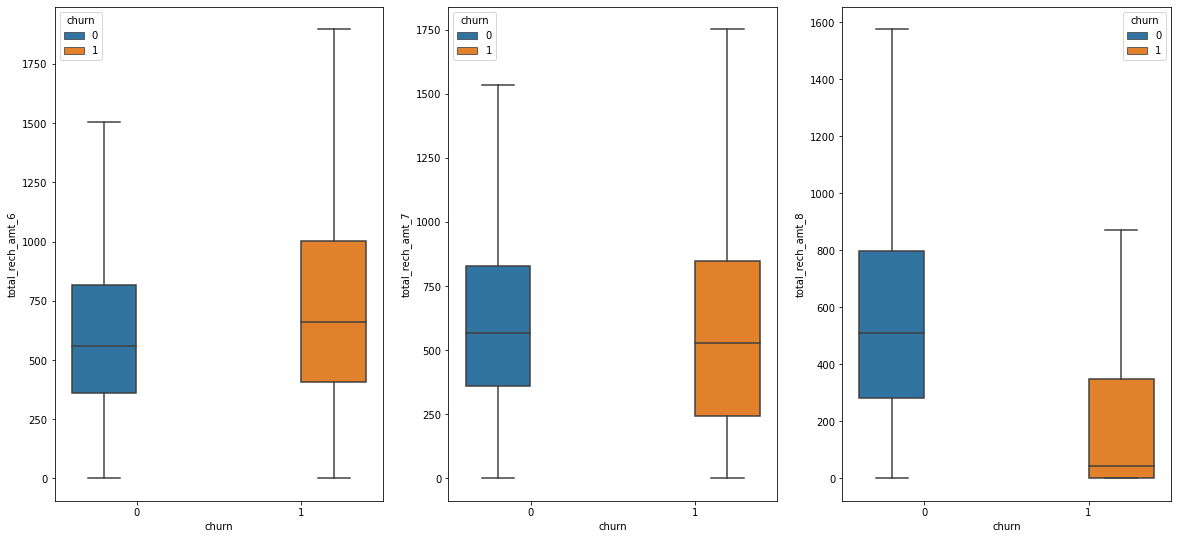

In [50]:
## Analysis to drwa insight based on customer pattern for doing monthly rechareg
print_churned_values('total_rech_amt')

plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
sns.boxplot(data=churn_high_val_cust, y='total_rech_amt_6',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,2)
sns.boxplot(data=churn_high_val_cust, y='total_rech_amt_7',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,3)
sns.boxplot(data=churn_high_val_cust, y='total_rech_amt_8',x="churn", showfliers=False,hue="churn")
plt.show()

#### Inferences:
- Median for churned and non-churned customers is same for total_rech_amt_7
- Very few customers are churned for total_rech_amt_8

{6: 'av_rech_amt_data_6', 7: 'av_rech_amt_data_7', 8: 'av_rech_amt_data_8'}
             mean_6  mean_7  mean_8   std_6  std_7   std_8
Churned      132.59  144.35  130.19  201.25  208.1  198.99
Non Churned  110.26   89.83   31.90  189.80  185.9  120.34


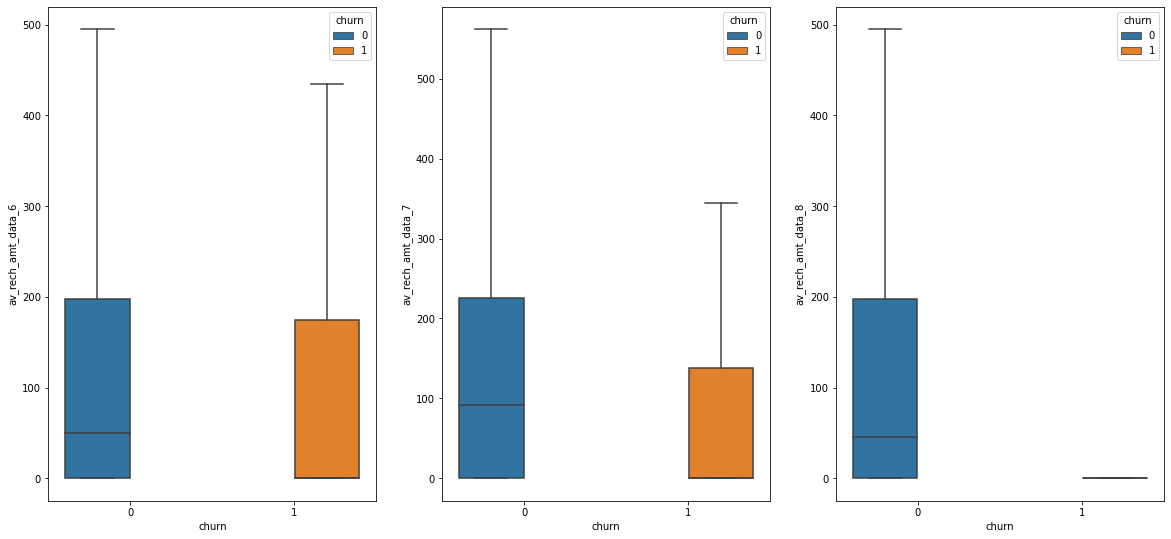

In [51]:
## Analysis to drwa insight based on customer pattern for doing average monthly rechareg
print_churned_values('av_rech_amt_data')
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
sns.boxplot(data=churn_high_val_cust, y='av_rech_amt_data_6',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,2)
sns.boxplot(data=churn_high_val_cust, y='av_rech_amt_data_7',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,3)
sns.boxplot(data=churn_high_val_cust, y='av_rech_amt_data_8',x="churn", showfliers=False,hue="churn")
plt.show()

#### Inferences:
- Churned customers median is zero for av_rech_amt_data_6 and av_rech_amt_data_7
- Churned customers are not present for av_rech_amt_data_8

{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}
             mean_6  mean_7  mean_8  std_6   std_7   std_8
Churned      169.10  173.40  166.83  172.1  176.85  171.42
Non Churned  172.18  159.66   85.54  209.4  227.28  176.90


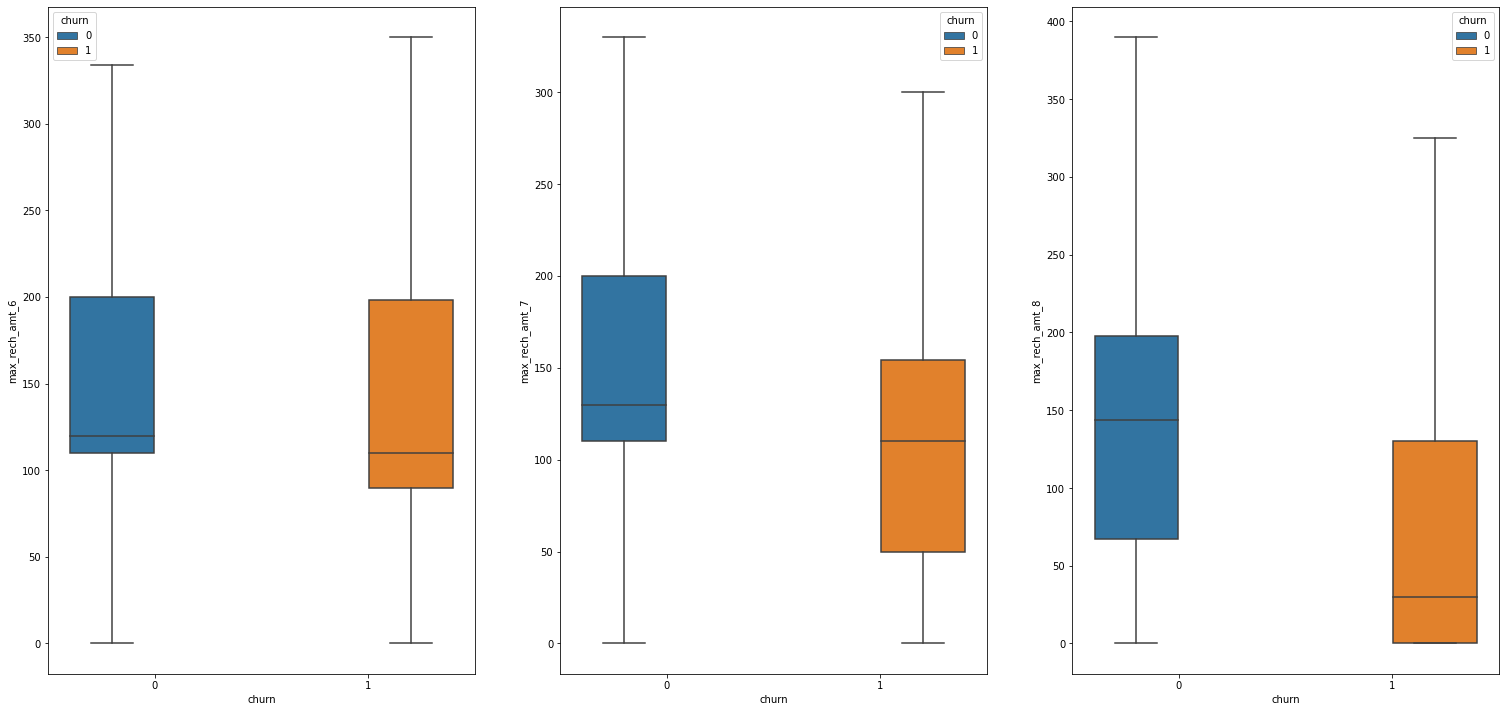

In [52]:
## Analysis to drwa insight based on customer pattern for doing maximum monthly rechareg
print_churned_values('max_rech_amt')

plt.figure(figsize=(26,27))
plt.subplot(2,3,1)
sns.boxplot(data=churn_high_val_cust, y='max_rech_amt_6',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,2)
sns.boxplot(data=churn_high_val_cust, y='max_rech_amt_7',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,3)
sns.boxplot(data=churn_high_val_cust, y='max_rech_amt_8',x="churn", showfliers=False,hue="churn")
plt.show()

{6: 'last_day_rch_amt_6', 7: 'last_day_rch_amt_7', 8: 'last_day_rch_amt_8'}
             mean_6  mean_7  mean_8   std_6   std_7   std_8
Churned      100.62  102.28   97.46  140.88  139.63  145.58
Non Churned  104.54   78.81   35.75  173.64  154.05  128.44


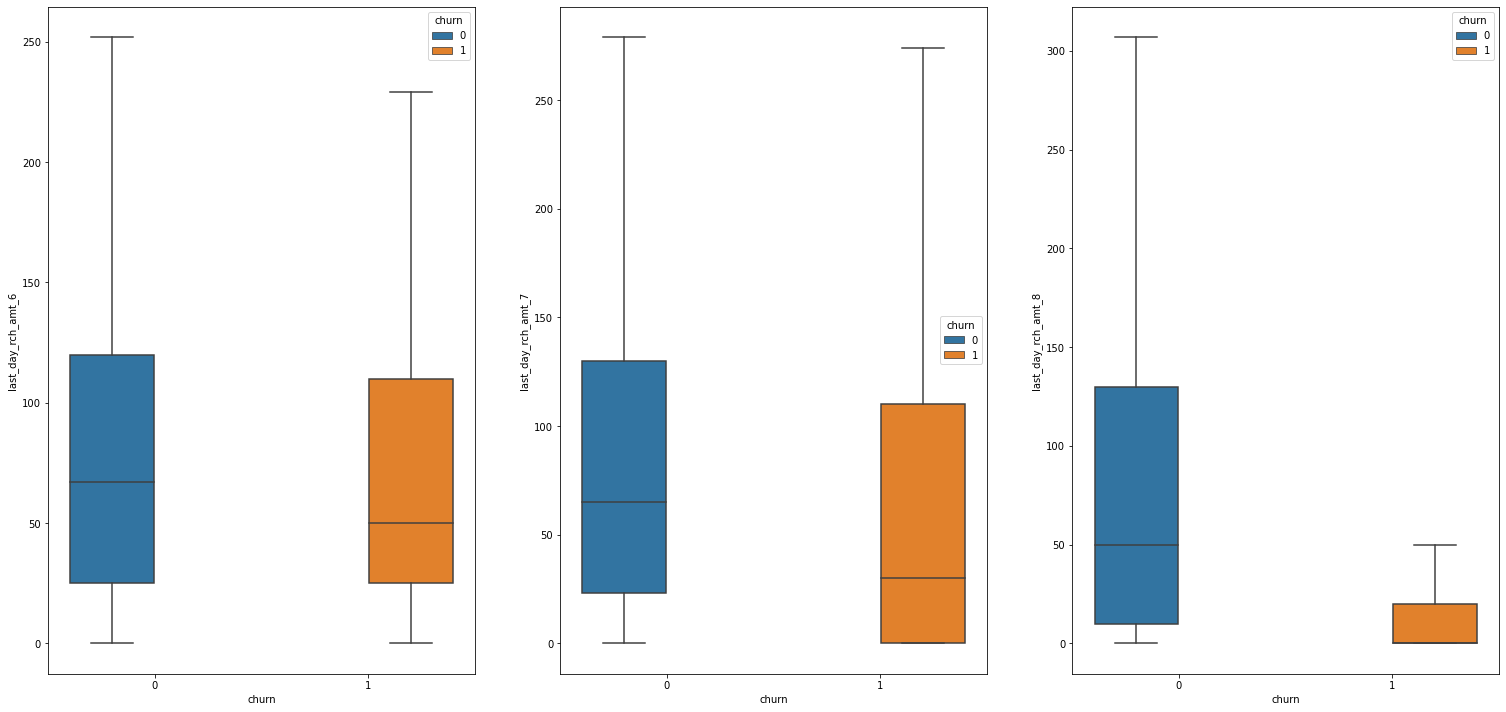

In [53]:
## Analysis to drwa insight based on customer pattern for doing last day monthly rechareg
print_churned_values('last_day_rch_amt')

plt.figure(figsize=(26,27))
plt.subplot(2,3,1)
sns.boxplot(data=churn_high_val_cust, y='last_day_rch_amt_6',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,2)
sns.boxplot(data=churn_high_val_cust, y='last_day_rch_amt_7',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,3)
sns.boxplot(data=churn_high_val_cust, y='last_day_rch_amt_8',x="churn", showfliers=False,hue="churn")
plt.show()

#### Inferences:
-There is a huge drop in maximum recharge amount for data in the 8th month for churned customers.

{6: 'vol_3g_mb_6', 7: 'vol_3g_mb_7', 8: 'vol_3g_mb_8'}
             mean_6  mean_7  mean_8   std_6   std_7   std_8
Churned      350.20  383.85  375.18  923.78  927.67  943.54
Non Churned  282.06  220.01   87.69  797.62  757.02  513.55


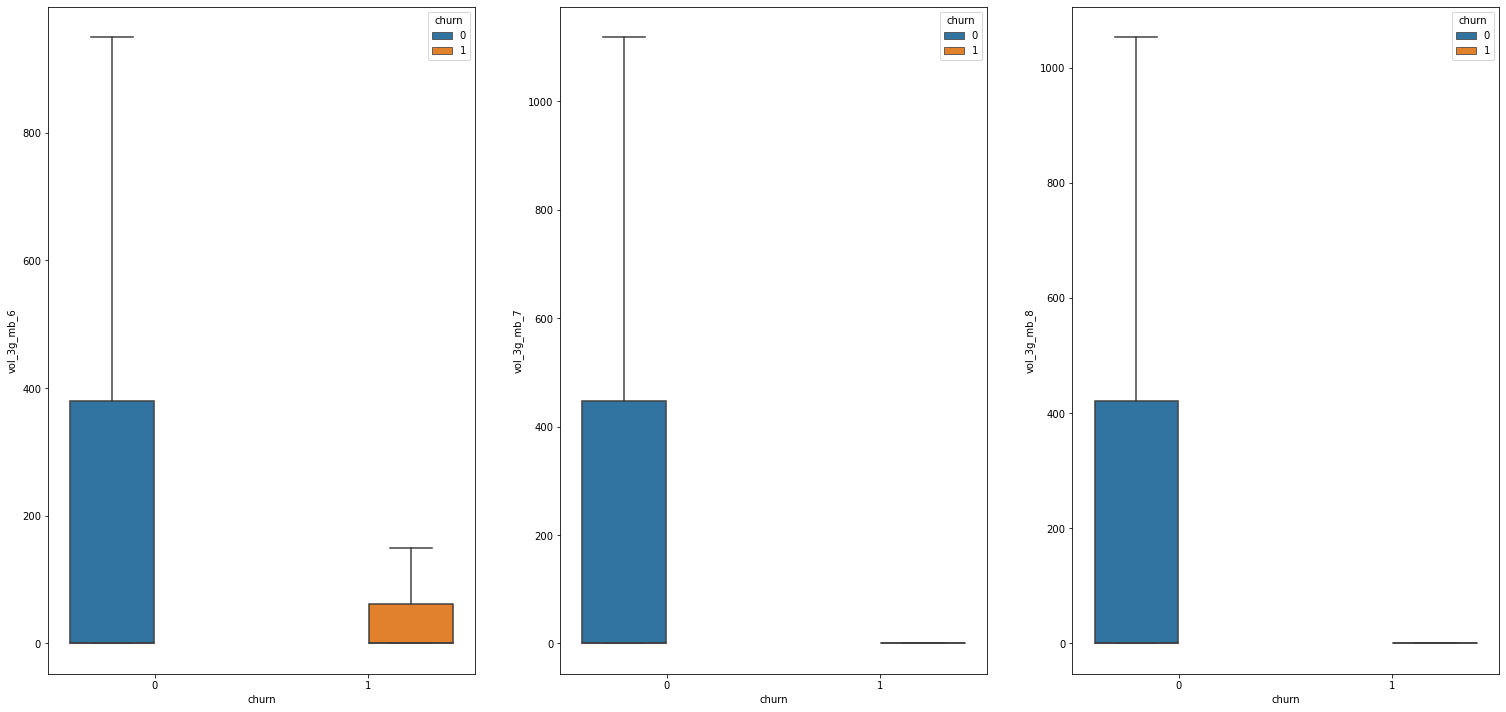

In [54]:
## Analysis to drwa insight based on customer pattern for doing  monthly rechareg
print_churned_values('vol_3g_mb')

plt.figure(figsize=(26,27))
plt.subplot(2,3,1)
sns.boxplot(data=churn_high_val_cust, y='vol_3g_mb_6',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,2)
sns.boxplot(data=churn_high_val_cust, y='vol_3g_mb_7',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,3)
sns.boxplot(data=churn_high_val_cust, y='vol_3g_mb_8',x="churn", showfliers=False,hue="churn")
plt.show()

#### Inferences:
- Churned customers are not present for vol_3g_mb_7 and vol_3g_mb_8

{6: 'vol_2g_mb_6', 7: 'vol_2g_mb_7', 8: 'vol_2g_mb_8'}
             mean_6  mean_7  mean_8   std_6   std_7   std_8
Churned      127.80  128.21  113.18  332.32  334.23  322.92
Non Churned  112.11   90.03   23.23  306.63  296.78  140.08


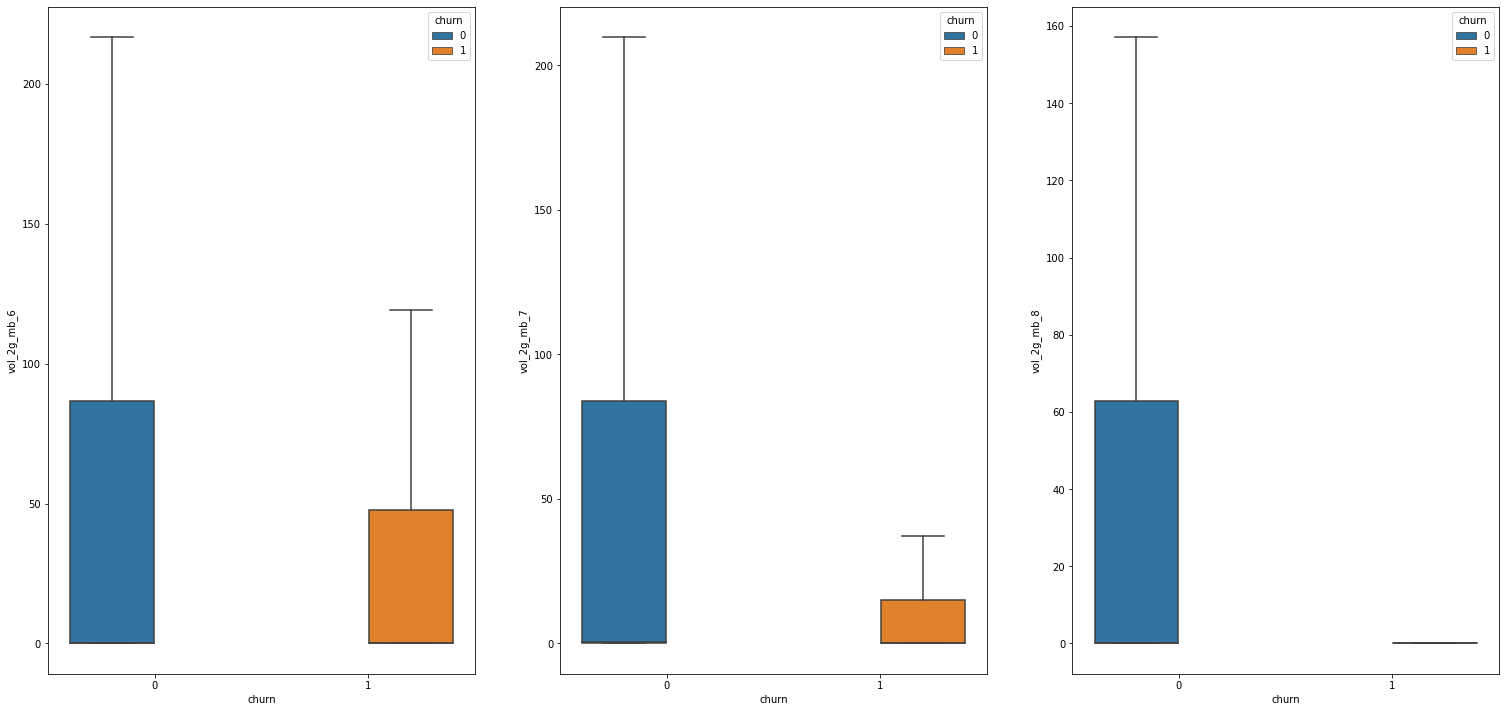

In [55]:
## Analysis to drwa insight based on customer pattern for doing  monthly rechareg
print_churned_values('vol_2g_mb')

plt.figure(figsize=(26,27))
plt.subplot(2,3,1)
sns.boxplot(data=churn_high_val_cust, y='vol_2g_mb_6',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,2)
sns.boxplot(data=churn_high_val_cust, y='vol_2g_mb_7',x="churn", showfliers=False,hue="churn")
plt.subplot(2,3,3)
sns.boxplot(data=churn_high_val_cust, y='vol_2g_mb_8',x="churn", showfliers=False,hue="churn")
plt.show()

#### Inferences:
- Chruned customers medien is zero for vol_2g_mb_6 and vol_2g_mb_7

In [56]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = churn_high_val_cust.columns[churn_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_3g_7',
 'monthly_3g_6',
 'monthly_2g_7',
 'monthly_3g_8',
 'monthly_2g_8']

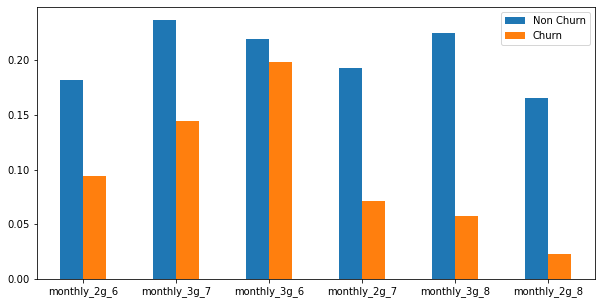

In [57]:
##Analyze trend for monthly subscription of 2g and 3g services for high value customers
df=churn_high_val_cust
columns_list=monthly_subcription_2g_3g
df_0 = df[df.churn==0].filter(columns_list)
df_1 = df[df.churn==1].filter(columns_list)

mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

frames = [mean_df_0, mean_df_1]
mean_bar = pd.concat(frames)

mean_bar.T.plot.bar(figsize=(10,5),rot=0)
plt.show()

arpu_8    	Average revenue per user
total_ic_mou_6 ,total_og_mou_7     	Minutes of usage - voice calls

### Step 3: Model Building

#### 3.1 Splitting the data in Train and Test data

In [58]:
# got numeric from
churn_high_val_cust['churn'] = pd.to_numeric(churn_high_val_cust['churn'])

In [59]:
###train-test split of churn data
X = churn_high_val_cust.drop("churn", axis = 1)
y = churn_high_val_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [60]:
#storing the training set columns
train_columns=X_train.columns

In [61]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.141152
 0.0    0.062857
 1.0    0.025074
Name: churn, dtype: float64

In [62]:
##Check the shape of test data (target variable)
y_test.shape

(7489,)

In [63]:
##Check the shape of train data (target variable)
y_train.shape

(22464,)

In [64]:
##Check the shape of train data 
X_train.shape

(22464, 146)

In [65]:
##Check the shape of test data 
X_test.shape

(7489, 146)

In [66]:
# replace categories with aggregated values
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

#### 3.2 Handling Class Imbalance

In [67]:
##Importing SMOTE 
from imblearn.over_sampling import SMOTE

In [68]:
##Fit the data for fixing class imbalance
smote = SMOTE(sampling_strategy='auto')
X_train_new,y_train_new = smote.fit_resample(X_train,y_train)

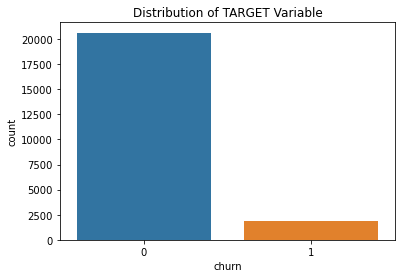

In [69]:
##Target Varible distribution before Class Imbalance
sns.countplot(y_train)
plt.title("Distribution of TARGET Variable")
plt.show()

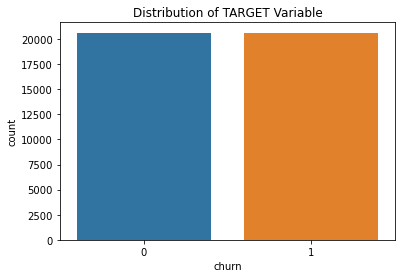

In [70]:
##Target Varible distribution after handling Class Imbalance
sns.countplot(y_train_new)
plt.title("Distribution of TARGET Variable")
plt.show()

#### 3.3 Scaling the test and train data 

In [71]:
##Scaling Data
scaler = StandardScaler()

X_train_new[:] = scaler.fit_transform(X_train_new[:])

In [72]:
## Transforming the test data
X_test[:] = scaler.transform(X_test[:])

#### 3.4 Building Logistic Regression

In [73]:
##Creating a logistic regression model and fitting the training data
clf=LogisticRegression()
clf.fit(X_train_new,y_train_new)

LogisticRegression()

In [74]:
##Check the model score
clf.score(X_train_new,y_train_new)

0.9164203692039343

In [75]:
##Predict for training data
y_train_pred=clf.predict(X_train_new)

In [76]:
##Predict for testing data
y_test_pred=clf.predict(X_test)

In [77]:
##Analyze the confusion matrix for training data
confusion_matrix(y_train_new,y_train_pred)

array([[18862,  1777],
       [ 1673, 18966]], dtype=int64)

In [78]:
##Analyze the confusion matrix for testing data
confusion_matrix(y_test,y_test_pred)

array([[6286,  595],
       [ 220,  388]], dtype=int64)

In [79]:
##Derive the classification report for the training data
from sklearn.metrics import classification_report
print(classification_report(y_train_new,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     20639
           1       0.91      0.92      0.92     20639

    accuracy                           0.92     41278
   macro avg       0.92      0.92      0.92     41278
weighted avg       0.92      0.92      0.92     41278



In [80]:
##Derive the classification report for the testing data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6881
           1       0.39      0.64      0.49       608

    accuracy                           0.89      7489
   macro avg       0.68      0.78      0.71      7489
weighted avg       0.92      0.89      0.90      7489



#### Observation - 
Logistic Regression oprimized with RFE overall gives a accuracy of 91% which is decent but it can be observed in confusion matrix that model is not able to precisely identify true negatives due to class imbalance 

#### 3.5 Building Random Forest Model with PCA

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [82]:
##Creating a custom function for evaluating the model performce in different useful parameters 
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_new, dt_classifier.predict(X_train_new)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train_new)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [83]:
##Building a random forest classifier 
rf = RandomForestClassifier(random_state=42,n_estimators=50)

In [84]:
##Creating the pipeline for PCA
pca=Pipeline(steps=[('pca', PCA()), ('forest', rf)])

In [85]:
##Fitting the pca model on training data
pca.fit(X_train_new,y_train_new)

Pipeline(steps=[('pca', PCA()),
                ('forest',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [86]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       10.67
1       20.27
2       26.44
3       31.15
4       34.83
5       38.23
6       41.35
7       44.13
8       46.74
9       49.03
10      51.19
11      53.29
12      55.17
13      57.01
14      58.80
15      60.49
16      62.13
17      63.62
18      65.02
19      66.36
20      67.67
21      68.96
22      70.20
23      71.26
24      72.31
25      73.27
26      74.20
27      75.11
28      75.98
29      76.84
30      77.61
31      78.36
32      79.09
33      79.79
34      80.49
35      81.16
36      81.81
37      82.44
38      83.06
39      83.66
40      84.26
41      84.84
42      85.41
43      85.95
44      86.47
45      86.98
46      87.47
47      87.93
48      88.36
49      88.78
50      89.18
51      89.58
52      89.96
53      90.34
54      90.71
55      91.06
56      91.40
57      91.74
58      92.07
59      92.39
60      92.68
61      92.97
62      93.25
63      93.52
64      93.78
65      94.04
66      94.29
67      94.54
68      94.78
69      95.02
70      95.25
71    

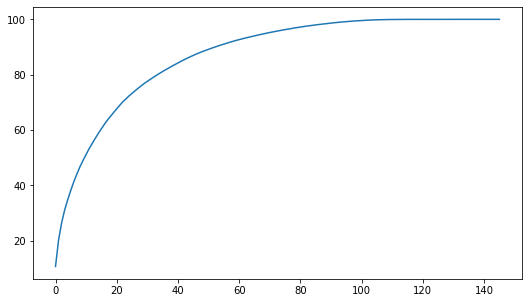

In [87]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

#### Based on the graph it can be seen that best suitable number of components which capture more than 95% of data information is 60

In [88]:
##Creating pipeline for PCA with random forest
pca=Pipeline(steps=[('pca', PCA(n_components=60)), ('forest', rf)])

In [89]:
##Fitting the model on tarining data
pca.fit(X_train_new,y_train_new)

Pipeline(steps=[('pca', PCA(n_components=60)),
                ('forest',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [90]:
##Predicting model on training and test data
y_train_pred_pca=pca.predict(X_train_new)
y_test_pred_pca=pca.predict(X_test)

In [91]:
##derive confusion matrix for training data
confusion_matrix(y_train_new,y_train_pred_pca)

array([[20625,    14],
       [    8, 20631]], dtype=int64)

In [92]:
##derive confusion matrix for testing data
confusion_matrix(y_test,y_test_pred_pca)

array([[6503,  378],
       [ 281,  327]], dtype=int64)

In [93]:
## Analyze the classification report for testing data
print(classification_report(y_test,y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6881
           1       0.46      0.54      0.50       608

    accuracy                           0.91      7489
   macro avg       0.71      0.74      0.72      7489
weighted avg       0.92      0.91      0.91      7489



In [94]:
## Analyze the classification report for training data
print(classification_report(y_train_new,y_train_pred_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20639
           1       1.00      1.00      1.00     20639

    accuracy                           1.00     41278
   macro avg       1.00      1.00      1.00     41278
weighted avg       1.00      1.00      1.00     41278



#### 3.6 HyperParameter Tunning using Grid Search

In [95]:
##Set the parameters to be used for hyper parameter tunning
params = {
    'forest__max_depth': [10,12,20],
    'forest__max_depth': [10, 20],
    'forest__max_features': [40,50,80],
    'forest__n_estimators': [60]
}

In [96]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=pca, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=2, scoring = "accuracy")

In [97]:
##fit the model using grid search CV
grid_search.fit(X_train_new,y_train_new)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pca', PCA(n_components=60)),
                                       ('forest',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'forest__max_depth': [10, 20],
                         'forest__max_features': [40, 50, 80],
                         'forest__n_estimators': [60]},
             scoring='accuracy', verbose=2)

In [98]:
##Find the best estimator 
grid_search.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=60)),
                ('forest',
                 RandomForestClassifier(max_depth=20, max_features=40,
                                        n_estimators=60, random_state=42))])

#### 3.7 Model Evaluation

In [99]:
##Predict on test data
y_test_pred_GCV=grid_search.predict(X_test)

In [100]:
##Predict on train data
y_train_pred_GCV=grid_search.predict(X_train_new)

In [101]:
##Derice confusion matrix for train data
confusion_matrix(y_train_new,y_train_pred_GCV)

array([[20214,   425],
       [    5, 20634]], dtype=int64)

In [102]:
##Derice confusion matrix for test data
confusion_matrix(y_test,y_test_pred_GCV)

array([[6440,  441],
       [ 245,  363]], dtype=int64)

In [103]:
#analyze classification report for training data
print(classification_report(y_train_new,y_train_pred_GCV))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20639
           1       0.98      1.00      0.99     20639

    accuracy                           0.99     41278
   macro avg       0.99      0.99      0.99     41278
weighted avg       0.99      0.99      0.99     41278



In [104]:
#analyze classification report for testing data
print(classification_report(y_test,y_test_pred_GCV))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6881
           1       0.45      0.60      0.51       608

    accuracy                           0.91      7489
   macro avg       0.71      0.77      0.73      7489
weighted avg       0.92      0.91      0.91      7489



#### Final Model  - 

It can be observed that Random Forest along with Principal Component Analysis is a better performing model overall with a overall accuracy of 91% and recall close to 60% for churn category on test data
The performace can be further optimized by either more regressive hyperparameter tunning which requires more advance computations (depending on size of data).

### Step 4: Conclusion

#### Indicators of Customer about to churn from a telecom operator

1. Based on the analysis it can be inferred that downfall in recharge amount based on the trend of 3 months (before churn) is a strong indicator

2. Sharp decrease in services used by customers e.g. internet used (2G & 3G both), incoming and Outgoing calls  in last 2 months (before churn happened) is another critical indicator to predict churn


#### Business Recommendation 
- Based on the customer behavior of the last 2-3 months Telecom Company should rollout offers for such customers so that they refrain from churning 
- Customer Care Executive shall reach out to high-value customers who have a high probability of churn 
- Any query/ticket raised by high-value customers shall be addressed on priority as it will result in a better service experience 
- customized offer should be provided to such customers suitable for their requirements at a cheaper cost